In [37]:
import sys
sys.path.append("..")


import cv2
import numpy as np
from glob import glob
from models import Yolov4
# Define density thresholds
HIGH_DENSITY_THRESHOLD = 20
MEDIUM_DENSITY_THRESHOLD = 10



In [38]:

import matplotlib.pyplot as plt

nms iou: 0.413 score: 0.3
all weights read
load from ../yolov4.weights
img shape:  (5184, 3456, 3)
1/1 [==============================] - 5s 5s/step
# of bboxes: 22


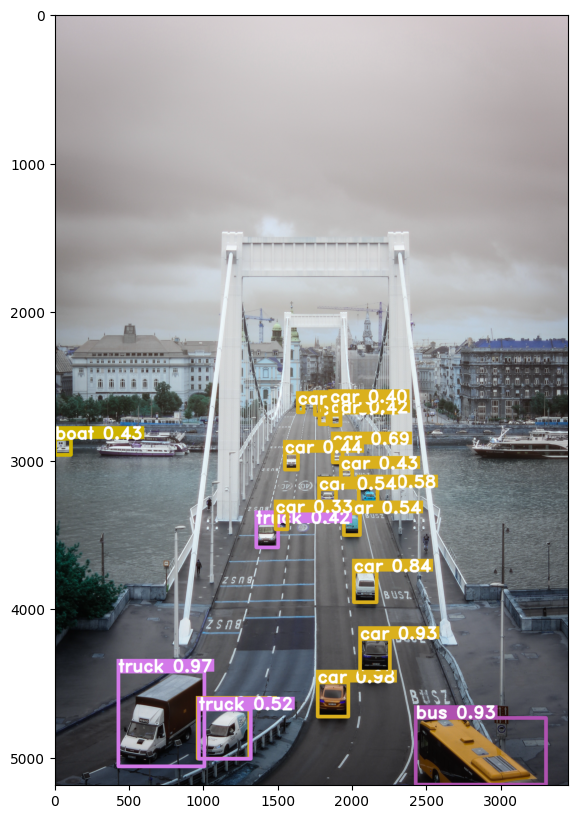

array([[[189, 182, 185],
        [189, 182, 185],
        [188, 181, 186],
        ...,
        [203, 191, 197],
        [203, 191, 197],
        [203, 191, 197]],

       [[189, 182, 185],
        [189, 182, 185],
        [188, 181, 186],
        ...,
        [204, 192, 198],
        [204, 192, 198],
        [204, 192, 198]],

       [[189, 182, 185],
        [189, 182, 185],
        [188, 181, 186],
        ...,
        [205, 193, 199],
        [205, 193, 199],
        [205, 193, 199]],

       ...,

       [[ 34,  33,  37],
        [ 34,  33,  37],
        [ 34,  33,  37],
        ...,
        [ 53,  57,  68],
        [ 52,  56,  67],
        [ 52,  56,  67]],

       [[ 34,  33,  37],
        [ 34,  33,  37],
        [ 34,  33,  37],
        ...,
        [ 53,  57,  68],
        [ 52,  56,  67],
        [ 52,  56,  67]],

       [[ 34,  33,  37],
        [ 34,  33,  37],
        [ 34,  33,  37],
        ...,
        [ 53,  57,  68],
        [ 52,  56,  67],
        [ 52,  56,  67]]

In [39]:

raw_img = cv2.imread('../img/traffic/low2.jpg')

model = Yolov4(weight_path='../yolov4.weights',
               class_name_path='../class_names/coco_classes.txt')

output_img, detections = model.predict_img(raw_img, random_color=False, return_output=True)

output_img

In [40]:
print(detections[:5]) 

     x1    y1    x2    y2 class_name     score    w    h
0  1766  4493  1972  4723        car  0.976200  206  230
1   426  4420  1004  5058      truck  0.965346  578  638
2  2425  4732  3301  5181        bus  0.929886  876  449
3  2051  4200  2251  4429        car  0.929254  200  229
4  2009  3746  2162  3953        car  0.841348  153  207


In [41]:

num_vehicles = sum(detections['class_name'].isin(['car', 'truck']))
num_vehicles

20

In [42]:


if num_vehicles >= HIGH_DENSITY_THRESHOLD:
    color = (0, 0, 255)  
    label = 'High Density'
elif num_vehicles >= MEDIUM_DENSITY_THRESHOLD:
    color = (0, 255, 255) 
    label = 'Medium Density'
else:
    color = (0, 255, 0)  
    label = 'Low Density'


In [43]:

relevant_detections = detections[detections['class_name'].isin(['car', 'truck'])]

boxes = relevant_detections[['x1', 'y1', 'x2', 'y2']].values.tolist()


In [44]:

scale = 5
thickness = 10

(text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, scale, thickness)

text_x = (output_img.shape[1] - text_width) // 2
text_y = (output_img.shape[0] + text_height) // 2

cv2.rectangle(output_img, (text_x - 20, text_y + 20), (text_x + text_width + 20, text_y - text_height - 20), (0, 0, 0), -1)

cv2.putText(output_img, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, scale, (255, 255, 255), thickness)

output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)



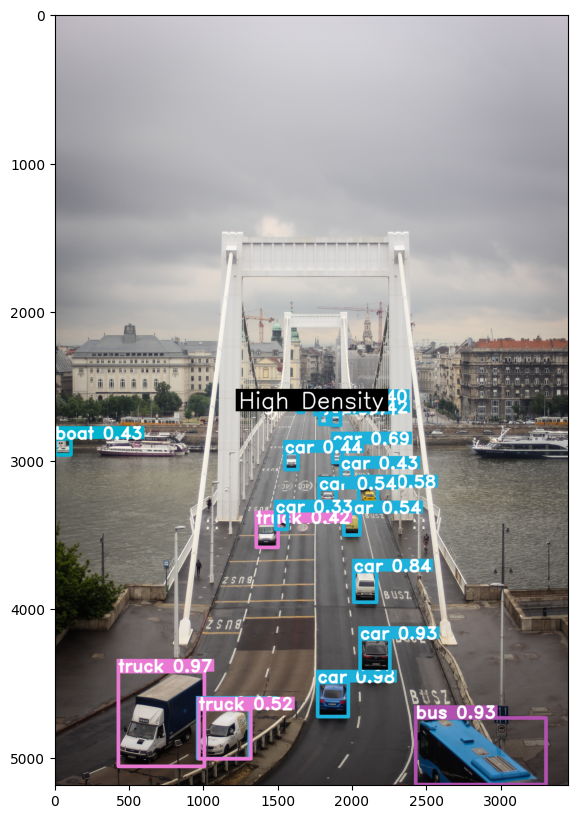

In [45]:

plt.figure(figsize=(10,10))
plt.imshow(output_img_rgb)
plt.show()